In [24]:
import gymnasium as gym
import environment
import numpy as np

from stable_baselines3 import PPO
from stable_baselines3.common.evaluation import evaluate_policy

In [25]:
env = gym.make('AirfoilEnv-v0', n_params=10, max_steps=5, scale_actions = 0.4, airfoil_seed = [0.1*np.ones(10), -0.1*np.ones(10), 0.0], 
               cl_reward = True, cl_reset = 0.3, render_mode = "human")
model = PPO.load("15042024_ClTargetAuto_256_256_AntiNose", env=env)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [6]:
# Evaluate the agent
# NOTE: If you use wrappers with your environment that modify rewards,
#       this will be reflected here. To evaluate with original rewards,
#       wrap environment in a "Monitor" wrapper before other wrappers.
mean_reward, std_reward = evaluate_policy(model, env=env, n_eval_episodes=10)
print(f"mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")

c:\Users\pablo\Documents\GitHub\2d-geometry-optimization-\venv\lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


mean_reward:1617.46 +/- 0.00


In [26]:
# Enjoy trained agent
vec_env = model.get_env()
obs = vec_env.reset()

Step: 0, Action: [[ 0.7570322   1.          0.887339    1.          1.          1.
   0.93763787  1.          0.81675863  1.         -0.2590043   0.18572918
  -0.2934716   0.62394816  0.81305563  0.7533801   0.6705558   1.
  -0.03673658 -0.5736167  -0.5823245 ]], Reward: [217.29393], Done: [False], Info: [{'step': 1, 'efficiency': 108.64545256143106, 'cl': 1.1239997576008243, 'TimeLimit.truncated': False}]


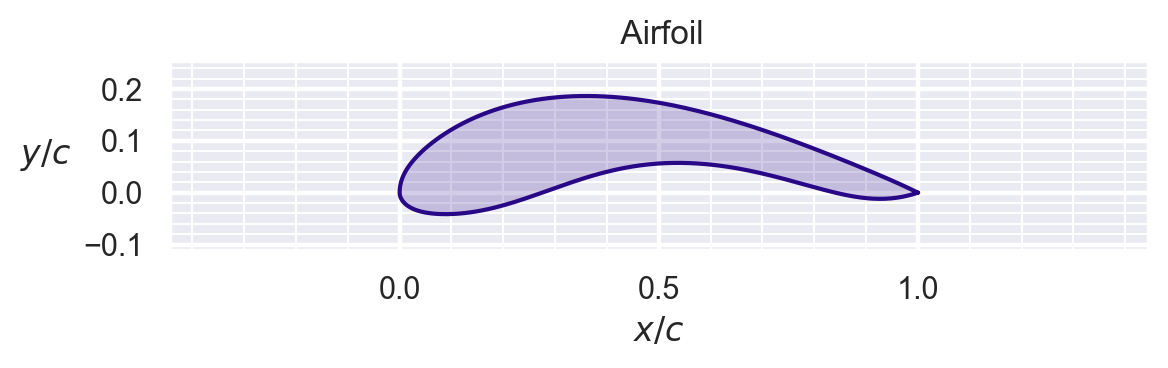

Step: 1, Action: [[-0.77612036 -0.98508626 -0.3585181  -0.67251015 -0.7968117  -1.
  -1.         -1.         -0.556284   -0.65758353  0.00194193 -0.18114258
   0.12979308 -0.7254662  -1.         -1.         -1.         -1.
  -0.45195746  0.01142794  0.5735553 ]], Reward: [-16.536043], Done: [False], Info: [{'step': 2, 'efficiency': -12.917360131475315, 'cl': -0.07878353558716272, 'TimeLimit.truncated': False}]


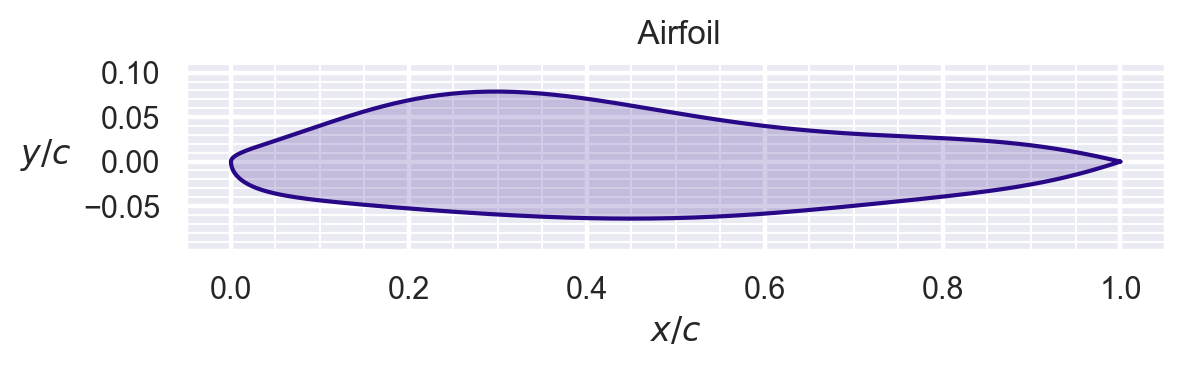

Step: 2, Action: [[ 0.9320526   0.9291933   0.1891235   0.8346361   1.          1.
   0.7153654   0.8889353   0.66890514  0.9213795   0.16611238  0.31514174
   0.30759662  0.81336325  1.          0.9146685   1.          1.
   0.18221024 -0.27721423 -0.5531045 ]], Reward: [267.25403], Done: [False], Info: [{'step': 3, 'efficiency': 133.62699093740278, 'cl': 1.2708105464859003, 'TimeLimit.truncated': False}]


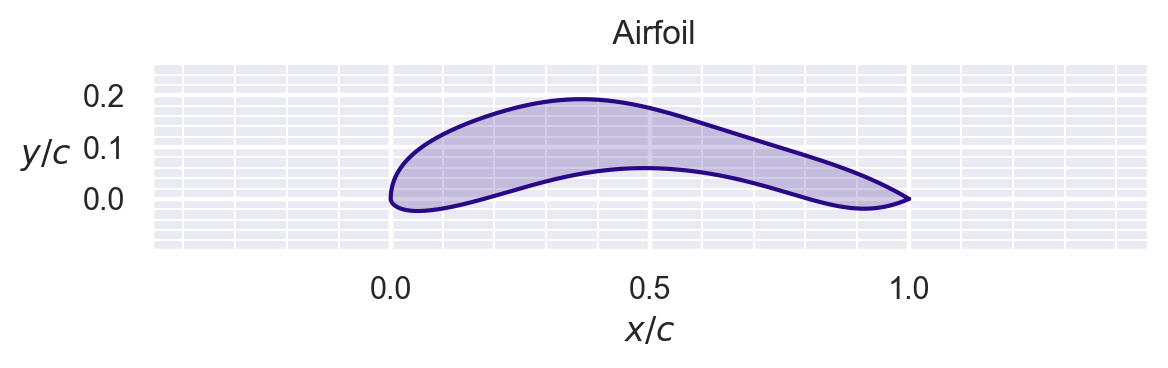

Step: 3, Action: [[-1.         -0.90654284 -0.23677777 -0.88904953 -1.         -1.
  -0.85322607 -1.         -0.715184   -0.8854131  -0.22244707 -0.5888183
  -0.33985558 -0.9672727  -1.         -0.87029475 -0.9629995  -1.
  -0.26320517  0.21176392  0.71292853]], Reward: [-33.9858], Done: [False], Info: [{'step': 4, 'efficiency': -19.615648224847035, 'cl': -0.12619692336824623, 'TimeLimit.truncated': False}]


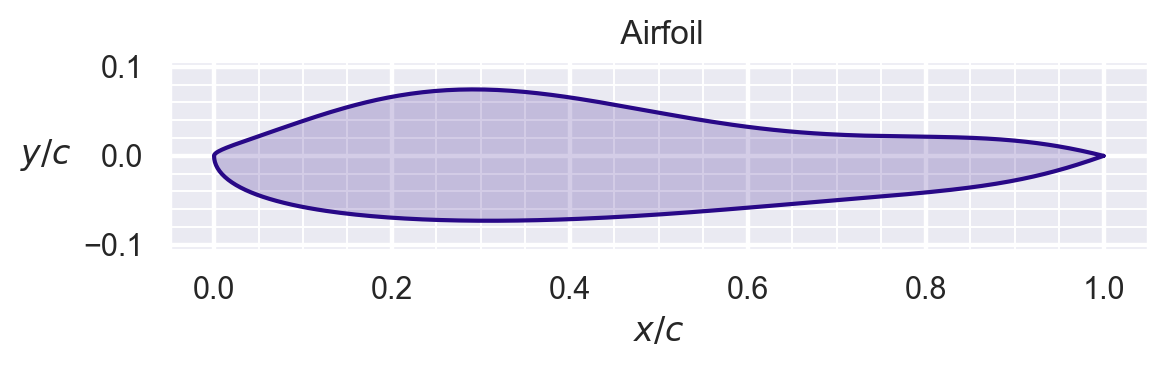

Step: 4, Action: [[ 1.          0.98434716  0.21023728  0.91492194  1.          1.
   0.90650296  1.          0.762216    0.9191348   0.27798283  0.6597785
   0.46042943  0.97079724  1.          0.87049174  1.          1.
   0.19226307 -0.24679518 -0.7147654 ]], Reward: [270.02524], Done: [ True], Info: [{'step': 5, 'efficiency': 135.01260181529807, 'cl': 1.3009534902764663, 'episode': {'r': 704.051346, 'l': 5, 't': 169.496322}, 'TimeLimit.truncated': False, 'terminal_observation': array([ 0.46518582,  0.50876456,  0.37656158,  0.57519937,  0.58127534,
        0.5       ,  0.38251206,  0.45557413,  0.49056473,  0.6190071 ,
       -0.11416568,  0.0562754 ,  0.00579678,  0.18614788,  0.22522226,
        0.16729826,  0.1830225 ,  0.3       , -0.25097036, -0.4497737 ,
       -0.22548425,  0.3       ], dtype=float32)}]


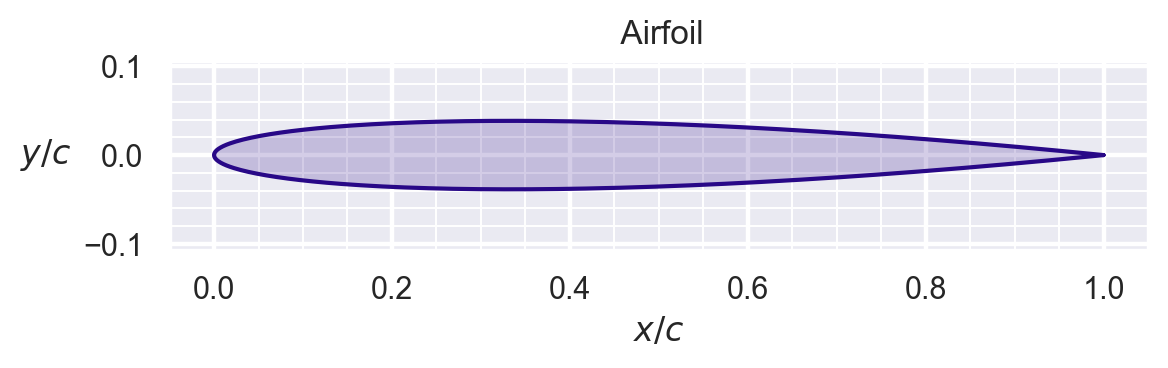

Step: 5, Action: [[ 0.7570322   1.          0.887339    1.          1.          1.
   0.93763787  1.          0.81675863  1.         -0.2590043   0.18572918
  -0.2934716   0.62394816  0.81305563  0.7533801   0.6705558   1.
  -0.03673658 -0.5736167  -0.5823245 ]], Reward: [217.29393], Done: [False], Info: [{'step': 1, 'efficiency': 108.64545256143106, 'cl': 1.1239997576008243, 'TimeLimit.truncated': False}]


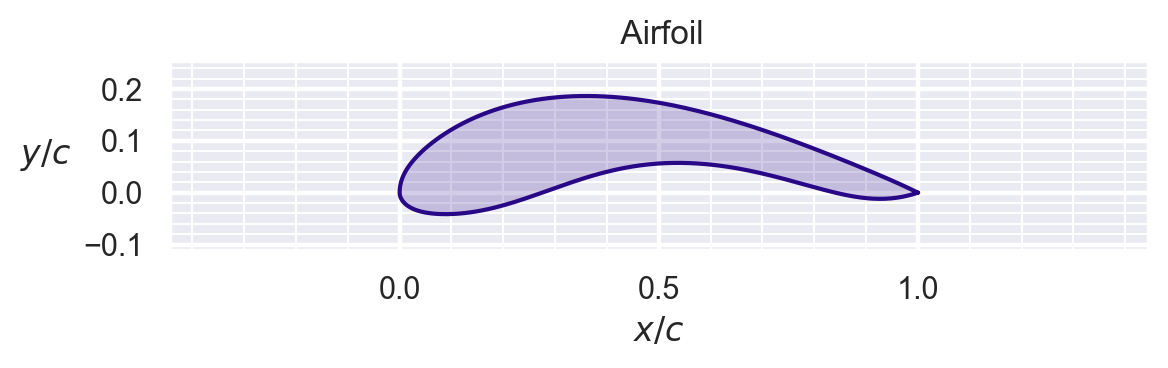

Step: 6, Action: [[-0.77612036 -0.98508626 -0.3585181  -0.67251015 -0.7968117  -1.
  -1.         -1.         -0.556284   -0.65758353  0.00194193 -0.18114258
   0.12979308 -0.7254662  -1.         -1.         -1.         -1.
  -0.45195746  0.01142794  0.5735553 ]], Reward: [-16.536043], Done: [False], Info: [{'step': 2, 'efficiency': -12.917360131475315, 'cl': -0.07878353558716272, 'TimeLimit.truncated': False}]


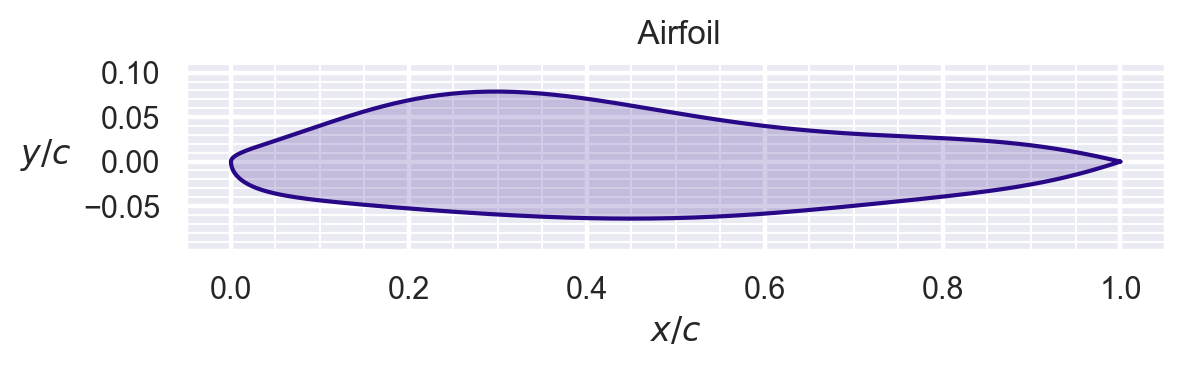

Step: 7, Action: [[ 0.9320526   0.9291933   0.1891235   0.8346361   1.          1.
   0.7153654   0.8889353   0.66890514  0.9213795   0.16611238  0.31514174
   0.30759662  0.81336325  1.          0.9146685   1.          1.
   0.18221024 -0.27721423 -0.5531045 ]], Reward: [267.25403], Done: [False], Info: [{'step': 3, 'efficiency': 133.62699093740278, 'cl': 1.2708105464859003, 'TimeLimit.truncated': False}]


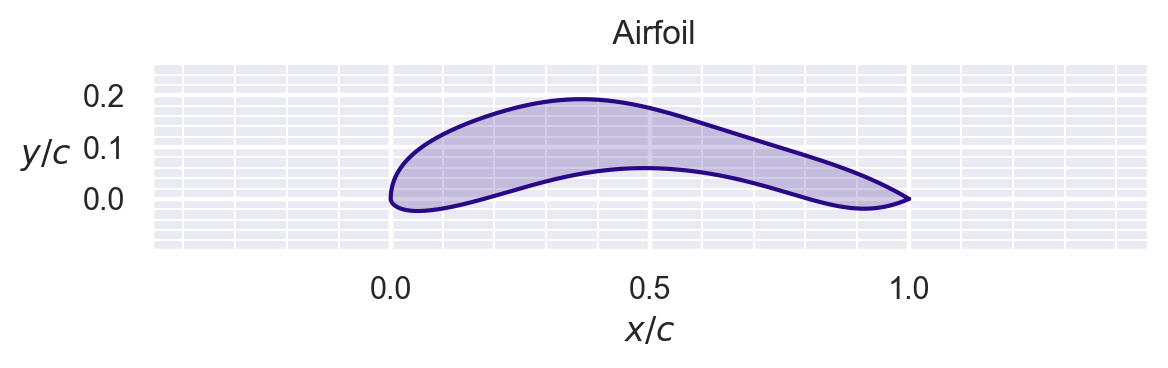

Step: 8, Action: [[-1.         -0.90654284 -0.23677777 -0.88904953 -1.         -1.
  -0.85322607 -1.         -0.715184   -0.8854131  -0.22244707 -0.5888183
  -0.33985558 -0.9672727  -1.         -0.87029475 -0.9629995  -1.
  -0.26320517  0.21176392  0.71292853]], Reward: [-33.9858], Done: [False], Info: [{'step': 4, 'efficiency': -19.615648224847035, 'cl': -0.12619692336824623, 'TimeLimit.truncated': False}]


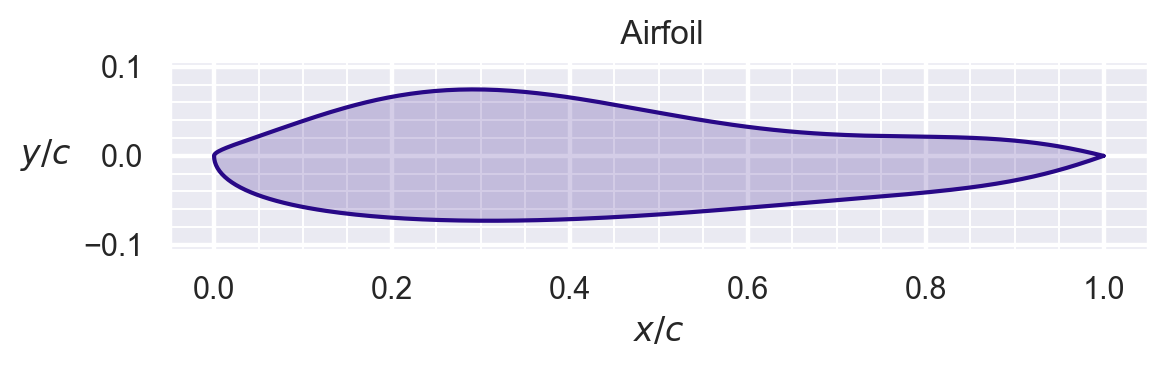

Step: 9, Action: [[ 1.          0.98434716  0.21023728  0.91492194  1.          1.
   0.90650296  1.          0.762216    0.9191348   0.27798283  0.6597785
   0.46042943  0.97079724  1.          0.87049174  1.          1.
   0.19226307 -0.24679518 -0.7147654 ]], Reward: [270.02524], Done: [ True], Info: [{'step': 5, 'efficiency': 135.01260181529807, 'cl': 1.3009534902764663, 'episode': {'r': 704.051346, 'l': 5, 't': 170.545806}, 'TimeLimit.truncated': False, 'terminal_observation': array([ 0.46518582,  0.50876456,  0.37656158,  0.57519937,  0.58127534,
        0.5       ,  0.38251206,  0.45557413,  0.49056473,  0.6190071 ,
       -0.11416568,  0.0562754 ,  0.00579678,  0.18614788,  0.22522226,
        0.16729826,  0.1830225 ,  0.3       , -0.25097036, -0.4497737 ,
       -0.22548425,  0.3       ], dtype=float32)}]


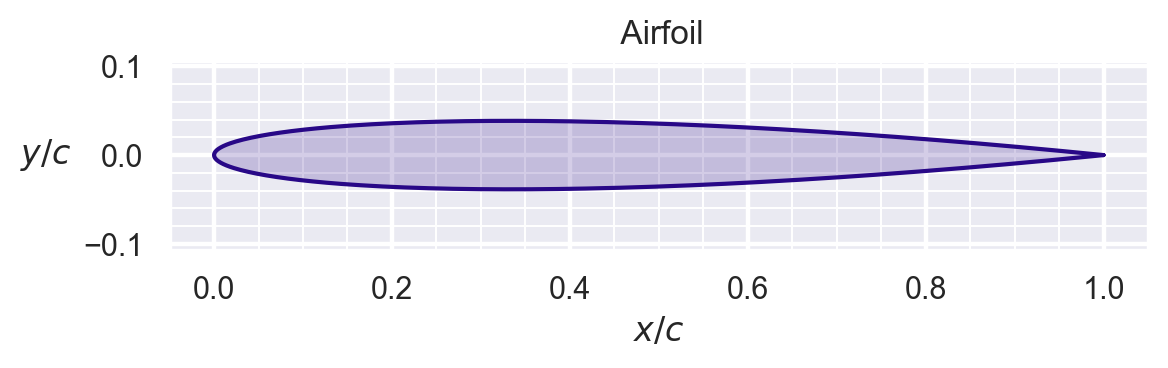

Step: 10, Action: [[ 0.7570322   1.          0.887339    1.          1.          1.
   0.93763787  1.          0.81675863  1.         -0.2590043   0.18572918
  -0.2934716   0.62394816  0.81305563  0.7533801   0.6705558   1.
  -0.03673658 -0.5736167  -0.5823245 ]], Reward: [217.29393], Done: [False], Info: [{'step': 1, 'efficiency': 108.64545256143106, 'cl': 1.1239997576008243, 'TimeLimit.truncated': False}]


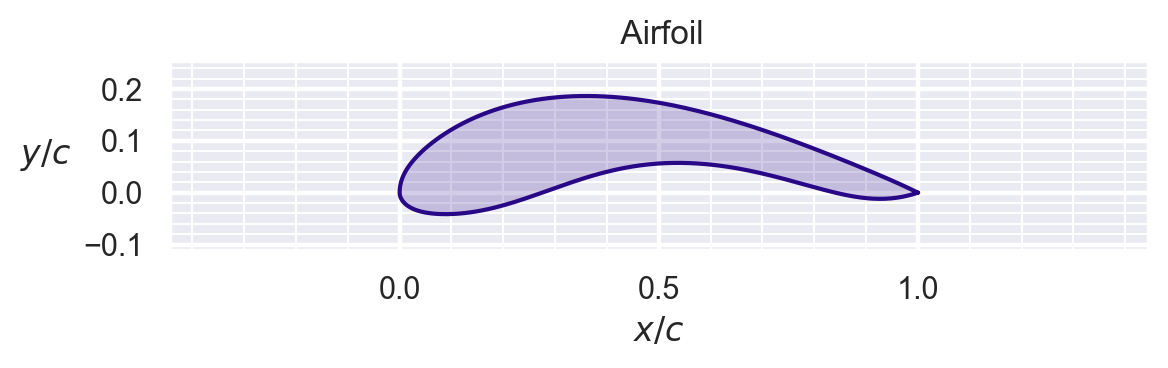

Step: 11, Action: [[-0.77612036 -0.98508626 -0.3585181  -0.67251015 -0.7968117  -1.
  -1.         -1.         -0.556284   -0.65758353  0.00194193 -0.18114258
   0.12979308 -0.7254662  -1.         -1.         -1.         -1.
  -0.45195746  0.01142794  0.5735553 ]], Reward: [-16.536043], Done: [False], Info: [{'step': 2, 'efficiency': -12.917360131475315, 'cl': -0.07878353558716272, 'TimeLimit.truncated': False}]


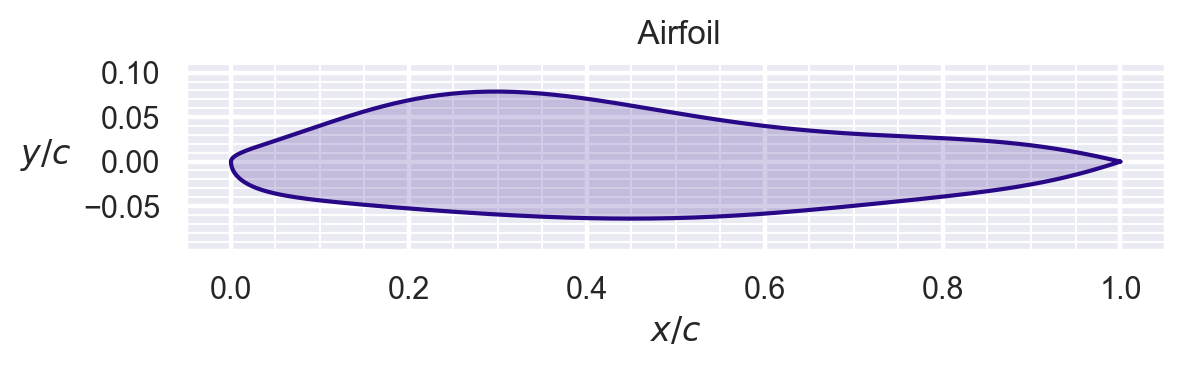

Step: 12, Action: [[ 0.9320526   0.9291933   0.1891235   0.8346361   1.          1.
   0.7153654   0.8889353   0.66890514  0.9213795   0.16611238  0.31514174
   0.30759662  0.81336325  1.          0.9146685   1.          1.
   0.18221024 -0.27721423 -0.5531045 ]], Reward: [267.25403], Done: [False], Info: [{'step': 3, 'efficiency': 133.62699093740278, 'cl': 1.2708105464859003, 'TimeLimit.truncated': False}]


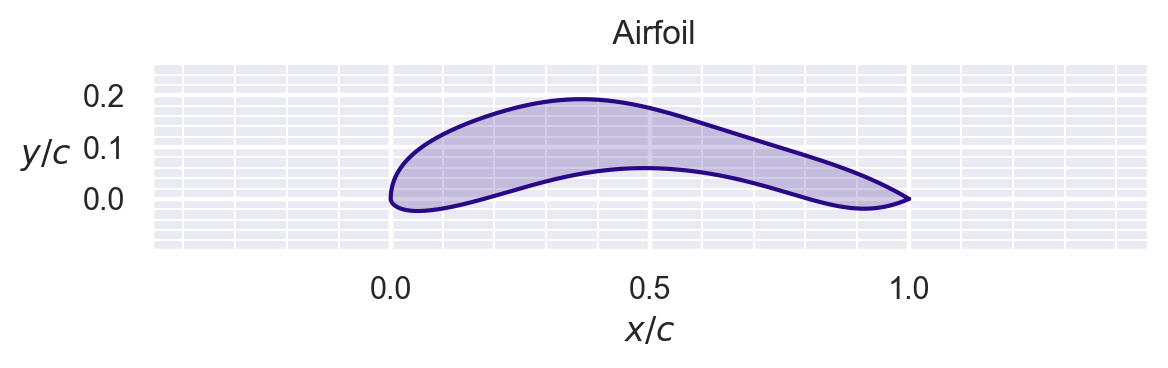

Step: 13, Action: [[-1.         -0.90654284 -0.23677777 -0.88904953 -1.         -1.
  -0.85322607 -1.         -0.715184   -0.8854131  -0.22244707 -0.5888183
  -0.33985558 -0.9672727  -1.         -0.87029475 -0.9629995  -1.
  -0.26320517  0.21176392  0.71292853]], Reward: [-33.9858], Done: [False], Info: [{'step': 4, 'efficiency': -19.615648224847035, 'cl': -0.12619692336824623, 'TimeLimit.truncated': False}]


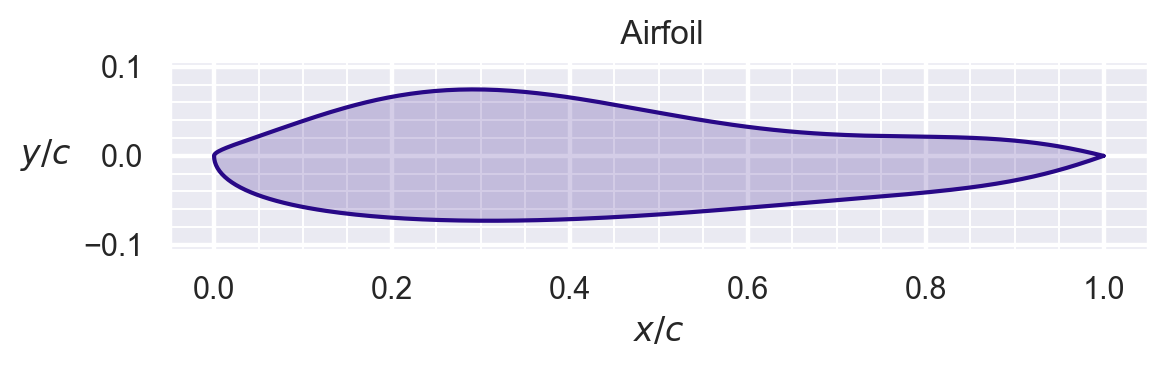

Step: 14, Action: [[ 1.          0.98434716  0.21023728  0.91492194  1.          1.
   0.90650296  1.          0.762216    0.9191348   0.27798283  0.6597785
   0.46042943  0.97079724  1.          0.87049174  1.          1.
   0.19226307 -0.24679518 -0.7147654 ]], Reward: [270.02524], Done: [ True], Info: [{'step': 5, 'efficiency': 135.01260181529807, 'cl': 1.3009534902764663, 'episode': {'r': 704.051346, 'l': 5, 't': 171.577683}, 'TimeLimit.truncated': False, 'terminal_observation': array([ 0.46518582,  0.50876456,  0.37656158,  0.57519937,  0.58127534,
        0.5       ,  0.38251206,  0.45557413,  0.49056473,  0.6190071 ,
       -0.11416568,  0.0562754 ,  0.00579678,  0.18614788,  0.22522226,
        0.16729826,  0.1830225 ,  0.3       , -0.25097036, -0.4497737 ,
       -0.22548425,  0.3       ], dtype=float32)}]


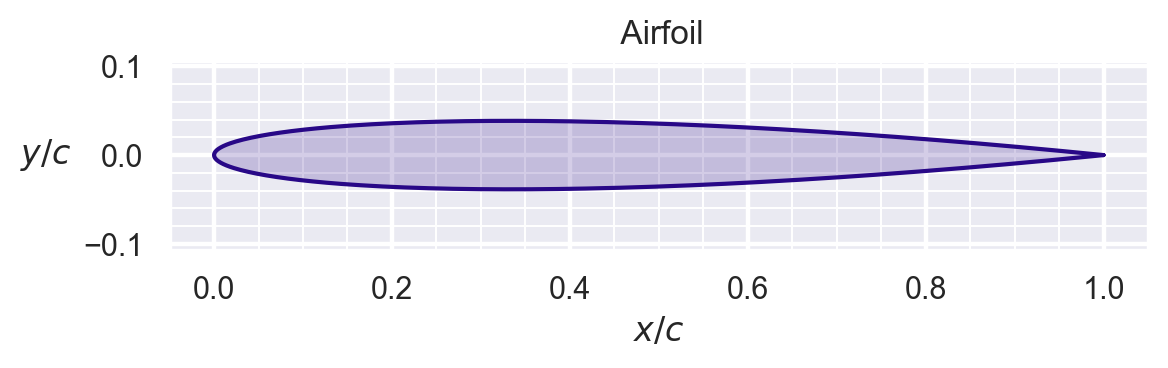

Step: 15, Action: [[ 0.7570322   1.          0.887339    1.          1.          1.
   0.93763787  1.          0.81675863  1.         -0.2590043   0.18572918
  -0.2934716   0.62394816  0.81305563  0.7533801   0.6705558   1.
  -0.03673658 -0.5736167  -0.5823245 ]], Reward: [217.29393], Done: [False], Info: [{'step': 1, 'efficiency': 108.64545256143106, 'cl': 1.1239997576008243, 'TimeLimit.truncated': False}]


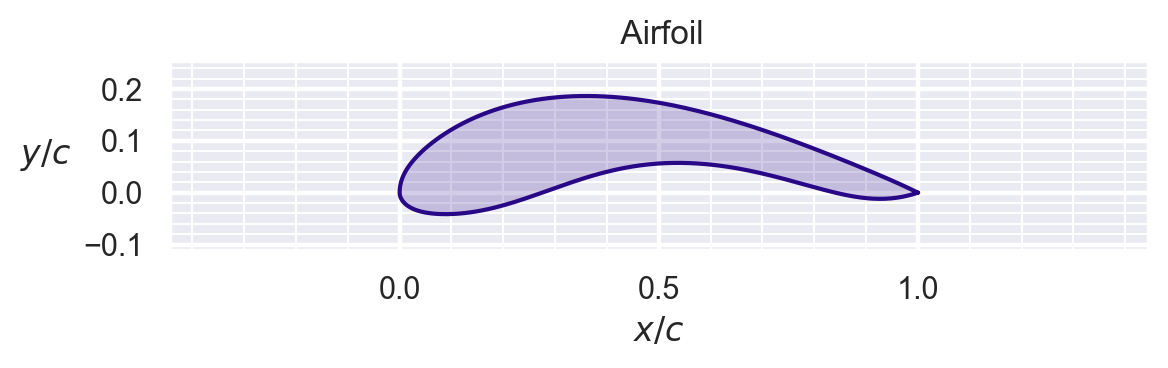

Step: 16, Action: [[-0.77612036 -0.98508626 -0.3585181  -0.67251015 -0.7968117  -1.
  -1.         -1.         -0.556284   -0.65758353  0.00194193 -0.18114258
   0.12979308 -0.7254662  -1.         -1.         -1.         -1.
  -0.45195746  0.01142794  0.5735553 ]], Reward: [-16.536043], Done: [False], Info: [{'step': 2, 'efficiency': -12.917360131475315, 'cl': -0.07878353558716272, 'TimeLimit.truncated': False}]


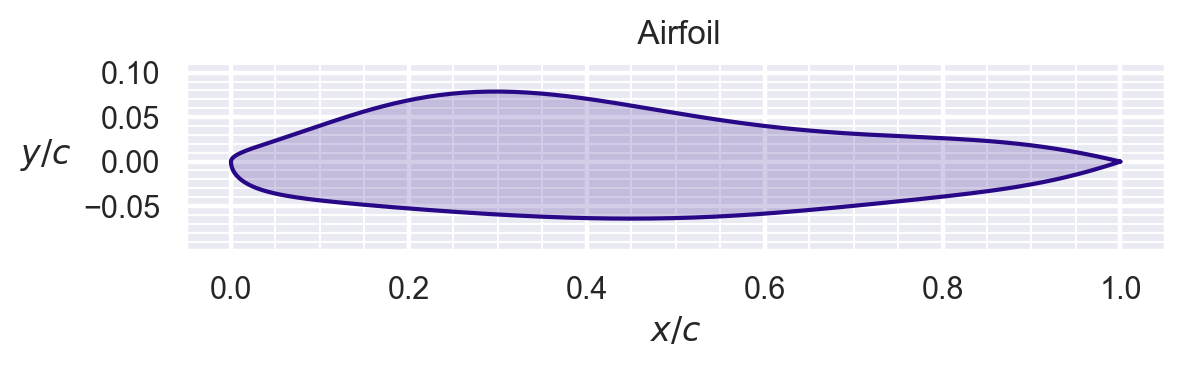

Step: 17, Action: [[ 0.9320526   0.9291933   0.1891235   0.8346361   1.          1.
   0.7153654   0.8889353   0.66890514  0.9213795   0.16611238  0.31514174
   0.30759662  0.81336325  1.          0.9146685   1.          1.
   0.18221024 -0.27721423 -0.5531045 ]], Reward: [267.25403], Done: [False], Info: [{'step': 3, 'efficiency': 133.62699093740278, 'cl': 1.2708105464859003, 'TimeLimit.truncated': False}]


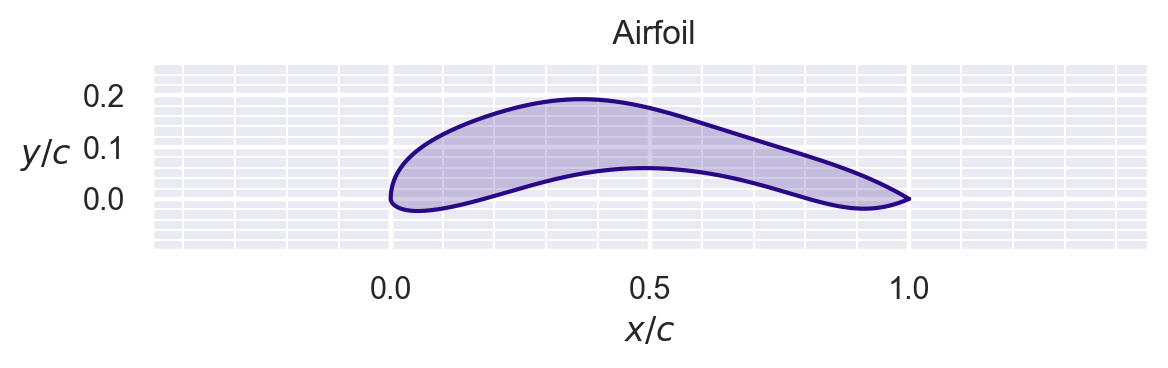

Step: 18, Action: [[-1.         -0.90654284 -0.23677777 -0.88904953 -1.         -1.
  -0.85322607 -1.         -0.715184   -0.8854131  -0.22244707 -0.5888183
  -0.33985558 -0.9672727  -1.         -0.87029475 -0.9629995  -1.
  -0.26320517  0.21176392  0.71292853]], Reward: [-33.9858], Done: [False], Info: [{'step': 4, 'efficiency': -19.615648224847035, 'cl': -0.12619692336824623, 'TimeLimit.truncated': False}]


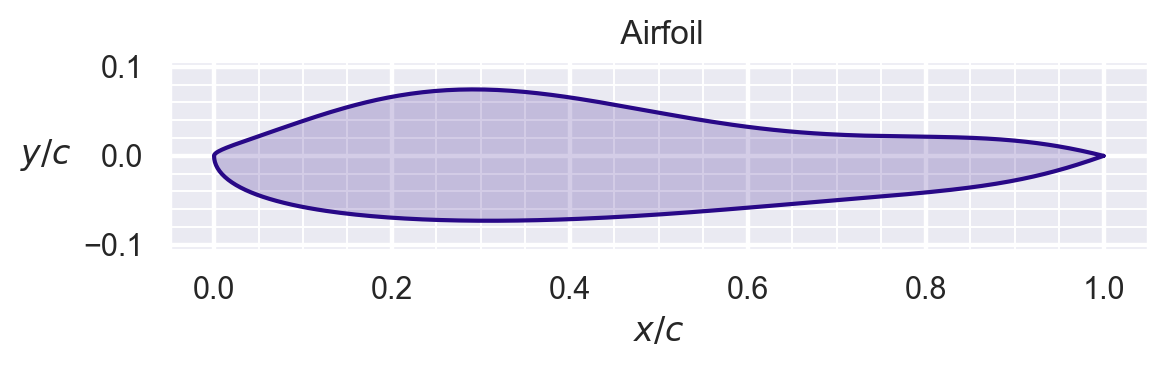

Step: 19, Action: [[ 1.          0.98434716  0.21023728  0.91492194  1.          1.
   0.90650296  1.          0.762216    0.9191348   0.27798283  0.6597785
   0.46042943  0.97079724  1.          0.87049174  1.          1.
   0.19226307 -0.24679518 -0.7147654 ]], Reward: [270.02524], Done: [ True], Info: [{'step': 5, 'efficiency': 135.01260181529807, 'cl': 1.3009534902764663, 'episode': {'r': 704.051346, 'l': 5, 't': 172.728646}, 'TimeLimit.truncated': False, 'terminal_observation': array([ 0.46518582,  0.50876456,  0.37656158,  0.57519937,  0.58127534,
        0.5       ,  0.38251206,  0.45557413,  0.49056473,  0.6190071 ,
       -0.11416568,  0.0562754 ,  0.00579678,  0.18614788,  0.22522226,
        0.16729826,  0.1830225 ,  0.3       , -0.25097036, -0.4497737 ,
       -0.22548425,  0.3       ], dtype=float32)}]


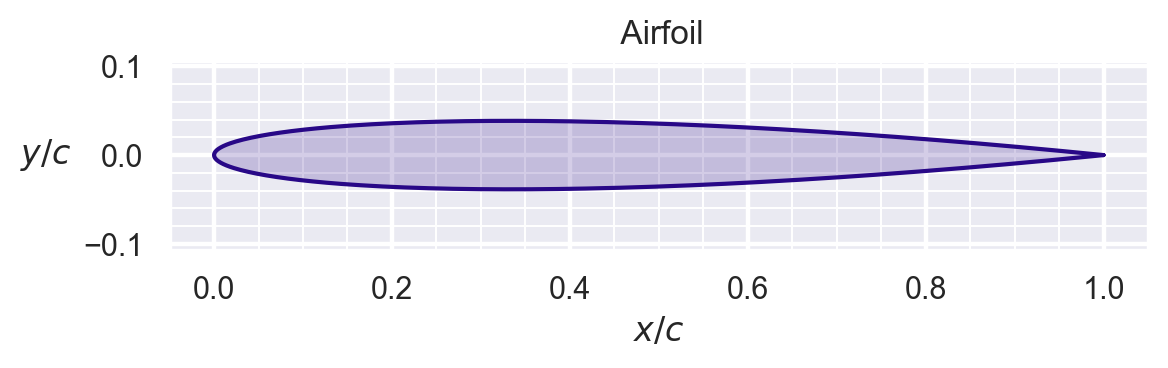

In [28]:

for i in range(20):
    action, _states = model.predict(obs, deterministic=True)
    obs, rewards, dones, info = vec_env.step(action)
    print(f"Step: {i}, Action: {action}, Reward: {rewards}, Done: {dones}, Info: {info}")
    vec_env.render()